# **1. Perkenalan Dataset**


## Sumber Dataset
Dataset diperoleh dari Kaggle:

https://www.kaggle.com/datasets/anishdevedward/loan-approval-dataset

## Deksripsi Dataset
Dataset Loan Approval berisi data simulasi mengenai pengajuan pinjaman individu yang digunakan untuk memprediksi apakah suatu pinjaman akan disetujui (loan_approved) atau ditolak. Dataset ini terdiri dari 2.000 observasi dengan 8 fitur, yang merepresentasikan karakteristik peminjam serta detail pinjaman yang diajukan.

Setiap baris data menggambarkan satu pemohon pinjaman dengan informasi sebagai berikut:
- name: nama peminjam
- city: kota tempat tinggal peminjam
- income: pendapatan peminjam
- credit_score: skor kredit peminjam
- loan_amount: jumlah pinjaman yang diajukan
- years_employed: lama masa kerja (dalam tahun)
- points: skor tambahan yang merepresentasikan penilaian kelayakan tertentu
- loan_approved: status persetujuan pinjaman (True = disetujui, False = ditolak) sebagai **variabel target**.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [132]:
df = pd.read_csv('../loan_approval.csv')

In [133]:
# menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object 
 1   city            2000 non-null   object 
 2   income          2000 non-null   int64  
 3   credit_score    2000 non-null   int64  
 4   loan_amount     2000 non-null   int64  
 5   years_employed  2000 non-null   int64  
 6   points          2000 non-null   float64
 7   loan_approved   2000 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 111.5+ KB


In [134]:
df.head()

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [135]:
# menampilkan nama kolom dataset
df.columns

Index(['name', 'city', 'income', 'credit_score', 'loan_amount',
       'years_employed', 'points', 'loan_approved'],
      dtype='object')

In [136]:
# menampilkan statistik deskriptif
df.describe()

,income,credit_score,loan_amount,years_employed,points
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,90585.977000,573.946000,25308.503000,20.441000,56.680000
std,34487.874907,160.564945,14207.320147,11.777813,18.638033
min,30053.000000,300.000000,1022.000000,0.000000,10.000000
25%,61296.250000,433.000000,12748.750000,10.000000,45.000000
50%,90387.500000,576.000000,25661.500000,21.000000,55.000000
75%,120099.750000,715.000000,37380.500000,31.000000,70.000000
max,149964.000000,850.000000,49999.000000,40.000000,100.000000


In [137]:
# mengecek missing values
df.isnull().sum()

name              0
city              0
income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
loan_approved     0
dtype: int64

In [138]:
# mengecek data duplikat
df.duplicated().sum()

np.int64(0)

In [139]:
# mengecek nilai unik per kolom
print("=== Unique Values Per Column ===")
for col in df.columns:
    unique_values = df[col].nunique()
    print(f"{col}: {unique_values} unique values")

=== Unique Values Per Column ===
name: 2000 unique values
city: 1882 unique values
income: 1988 unique values
credit_score: 537 unique values
loan_amount: 1968 unique values
years_employed: 41 unique values
points: 19 unique values
loan_approved: 2 unique values


Berdasarkan analisis jumlah nilai unik, kolom name memiliki nilai unik pada setiap baris sehingga hanya berfungsi sebagai identifier dan tidak memiliki nilai prediktif. Sementara itu, kolom city memiliki kardinalitas yang sangat tinggi (1.882 nilai unik dari 2.000 data) sehingga berpotensi menimbulkan noise dan menurunkan kemampuan generalisasi model jika digunakan. Oleh karena itu, kedua kolom tersebut dihapus sebelum proses pemodelan.

Fitur numerik lainnya memiliki variasi yang wajar dan relevan terhadap keputusan persetujuan pinjaman,

In [140]:
# mengecek distribusi nilai kolom target
df['loan_approved'].value_counts()

loan_approved
False    1121
True      879
Name: count, dtype: int64

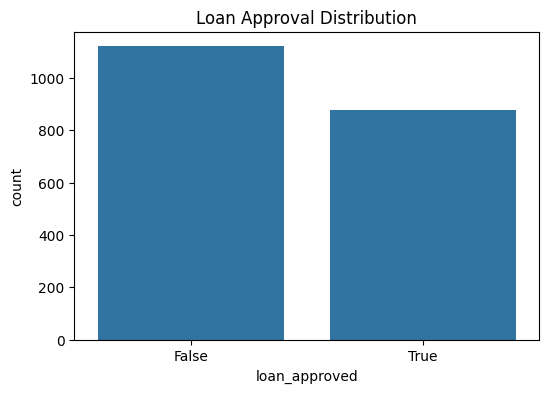

In [141]:
# Visualisasi Distribusi kolom target
plt.figure(figsize=(6,4))
sns.countplot(x='loan_approved', data=df)
plt.title("Loan Approval Distribution")
plt.show()

Berdasarkan distribusi nilai pada variabel target loan_approved, terdapat 1.121 data tidak disetujui (0) dan 879 data disetujui (1). Distribusi ini menunjukkan adanya sedikit ketidakseimbangan kelas, namun perbedaannya tidak signifikan

<function matplotlib.pyplot.show(close=None, block=None)>

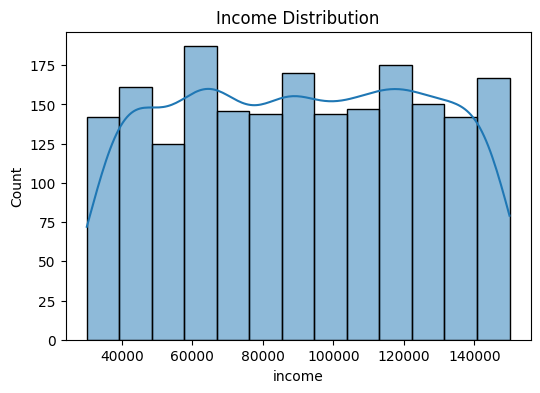

In [142]:
# Visualisasi Distribusi Fitur Income
plt.figure(figsize=(6,4))
sns.histplot(df['income'], kde=True)
plt.title('Income Distribution')
plt.show


Fitur income memiliki distribusi yang baik dan informatif, tidak memerlukan transformasi khusus, tetapi perlu dilakukan scaling sebelum pelatihan model.

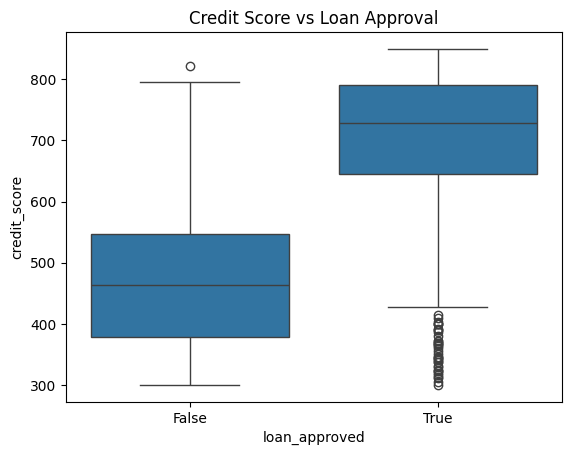

In [143]:
sns.boxplot(x='loan_approved', y='credit_score', data=df)
plt.title('Credit Score vs Loan Approval')
plt.show()

Boxplot menunjukkan perbedaan distribusi credit score yang jelas antara pemohon yang tidak disetujui dan disetujui pinjamannya. Kelompok dengan loan_approved = True memiliki median credit score yang jauh lebih tinggi dibandingkan dengan kelompok False, serta sebaran nilai yang cenderung berada pada rentang skor tinggi.

Meskipun terdapat beberapa outlier pada kelas yang disetujui dengan skor kredit rendah, secara umum visualisasi ini menunjukkan bahwa semakin tinggi credit score, semakin besar peluang pinjaman disetujui.

In [144]:
# mengecek outlier
numeric_cols = ['income', 'credit_score', 'loan_amount', 'years_employed', 'points']

def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound)|(data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

for col in numeric_cols:
    outliers, lb, ub = detect_outliers(df, col)
    print(f"{col} >> Outliers found: {len(outliers)} (Lower: {lb:.2f}, Upper: {ub:.2f})")

income >> Outliers found: 0 (Lower: -26909.00, Upper: 208305.00)
credit_score >> Outliers found: 0 (Lower: 10.00, Upper: 1138.00)
loan_amount >> Outliers found: 0 (Lower: -24198.88, Upper: 74328.12)
years_employed >> Outliers found: 0 (Lower: -21.50, Upper: 62.50)
points >> Outliers found: 0 (Lower: 7.50, Upper: 107.50)


In [145]:
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
print("Categorical Columns:", list(categorical_cols))

Categorical Columns: ['name', 'city', 'loan_approved']


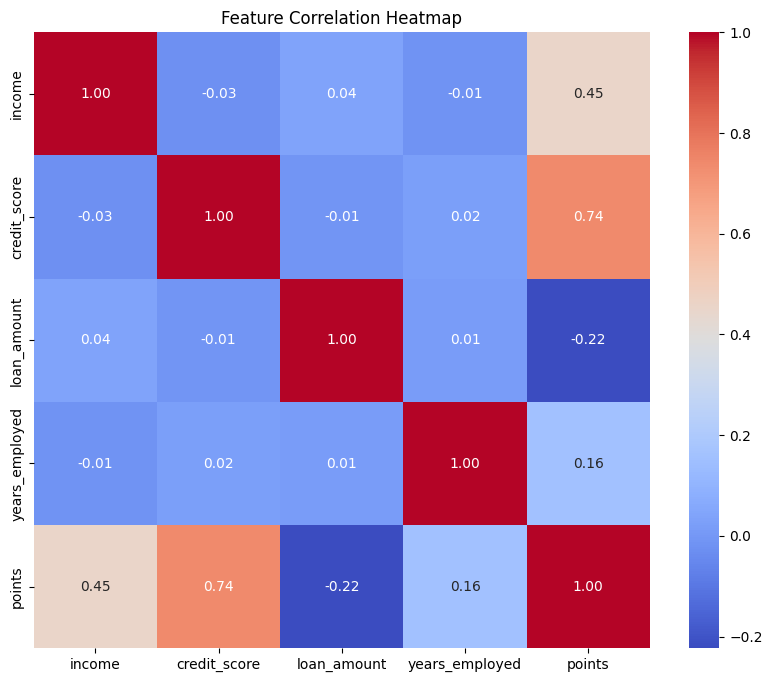

In [146]:
# analisis korelasi antar fitur
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [147]:
# Transformasi kolom Loan_approved
df['loan_approved'] = df['loan_approved'].astype(int)
df

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,0
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,0
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,0
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,0
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,0
...,...,...,...,...,...,...,...,...
1995,James Schaefer,Robertton,92163,770,12251,13,85.0,1
1996,Diana Lin,New Frank,38799,635,48259,17,40.0,0
1997,Brandon Meyer,East Haley,41957,763,16752,5,60.0,1
1998,Jason Price,Adamland,139022,360,24031,35,55.0,0


In [148]:
# drop fitur name & city
df = df.drop(columns=['name', 'city'])
df.head()

,income,credit_score,loan_amount,years_employed,points,loan_approved
0,113810,389,39698,27,50.0,0
1,44592,729,15446,28,55.0,0
2,33278,584,11189,13,45.0,0
3,127196,344,48823,29,50.0,0
4,66048,496,47174,4,25.0,0


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   income          2000 non-null   int64  
 1   credit_score    2000 non-null   int64  
 2   loan_amount     2000 non-null   int64  
 3   years_employed  2000 non-null   int64  
 4   points          2000 non-null   float64
 5   loan_approved   2000 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 93.9 KB


In [150]:
# memisahkan fitur dan label
X = df.drop(columns='loan_approved')
y = df['loan_approved']

In [151]:
# Scaling fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [152]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, Test Shape: {X_test.shape}")


Train shape: (1600, 5), Test Shape: (400, 5)
